In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from keras.datasets import mnist 

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
len(x_train)

60000

# READ THE DATA

In [0]:
X = x_train[87]

In [0]:
X    # an array : num bigger => color darker

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
X.shape

(28, 28)

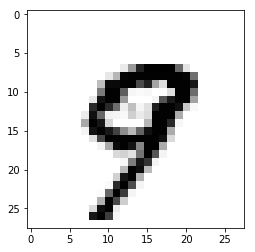

In [0]:
plt.imshow(X, cmap = "Greys")    #cmap : 指定顏色

In [0]:
y_train[87]

9

# 整理格式

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(10000,784)

# one-hot enconding

In [0]:
from keras.utils import np_utils

In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# CONSTRUCT A NERUAL NETWORK

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation ## DENSE: for fully connected
from keras.optimizers import Adam  ## 以防記憶性問題，套入亂數做gredient decent

In [0]:
model = Sequential()

In [0]:
model.add(Dense(32, input_dim = 784))
model.add(Activation("relu")) 

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.add(Dense(16))   ##前一層得知，4維輸入
model.add(Activation("relu"))

In [0]:
model.add(Dense(8))   ##前一層得知，4維輸入
model.add(Activation("relu"))

In [0]:
model.add(Dense(4))   ##前一層得知，4維輸入
model.add(Activation("relu"))

In [0]:
model.add(Dense(2))   ##前一層得知，4維輸入
model.add(Activation("relu"))

## output layer

In [0]:
model.add(Dense(10))
model.add(Activation("softmax"))

## 組裝網路(必須有loss func.)

In [0]:
model.compile(loss = "mse" , optimizer= Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) , metrics= ['accuracy'])   ##metrics 不一定要，但可讓訓練過程中資料知道

## Check network

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
activation_3 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
__________

In [0]:
784 * 32 + 32 # (input*layer = #Weight ) + bais

25120

# Training NN

In [0]:
model_20 = model.fit(x_train, y_train, batch_size = 100, epochs = 1000) 
# batch_size(min batch) :多少資料更新參數

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
60000/60000 [==============================] - 2s 31us/step - loss: 0.0838 - acc: 0.1985
Epoch 2/1000
60000/60000 [==============================] - 2s 25us/step - loss: 0.0812 - acc: 0.2090
Epoch 3/1000
60000/60000 [==============================] - 2s 26us/step - loss: 0.0808 - acc: 0.2112
Epoch 4/1000
60000/60000 [==============================] - 2s 26us/step - loss: 0.0763 - acc: 0.2788
Epoch 5/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0701 - acc: 0.3761
Epoch 6/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0675 - acc: 0.3889
Epoch 7/1000
60000/60000 [==============================] - 2s 26us/step - loss: 0.0662 - acc: 0.3947
Epoch 8/1000
60000/60000 [==============================] - 2s 28us/step - loss: 0.0639 - acc: 0.4460
Epoch 9/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0617 - acc: 0.4733
Epoch 10/1000
60000/60000 [=======

## 預測結果

In [0]:
from ipywidgets import interact

In [0]:
predict = model.predict_classes(x_test)

In [0]:
predict

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
def test(trynum):
  plt.imshow(x_test[trynum].reshape(28,28),cmap = 'Greys')
  print('predicted num : ', predict[trynum])

predicted num :  3


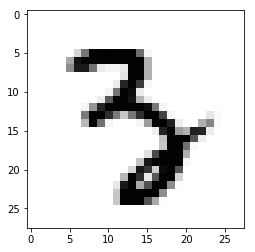

In [0]:
test(87)

## 測試資料分數

In [0]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 33us/step


In [0]:
print("loss: " , score[0])
print('acc: ', score[1])

loss:  0.014286476187733934
acc:  0.9226


## save neural network

In [0]:
model_json = model.to_json()
open('stupid_model.json','w').write(model_json)
model.save_weights('stupid_model_weights.h5')

## load saved NN

In [0]:
from keras.models import model_from_json

In [0]:
model = model_from_json(open('stupid_model.json').read())

In [0]:
model.load_weights('stupid_model_weights.h5')

In [0]:
model.compile(loss = 'mse', optimizer= Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False))

In [0]:
X = x_test[87]

In [0]:
np.array([X.ravel()])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  68, 156, 253, 253, 255, 253, 253, 253, 165,  18,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 237, 252, 252, 252

In [0]:
X = X.reshape(1,784)

In [0]:
X.shape

(1, 784)

In [0]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  68, 156, 253, 253, 255, 253, 253, 253, 165,  18,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 237, 252, 252, 252

In [0]:
model.predict_classes(X)

array([3])

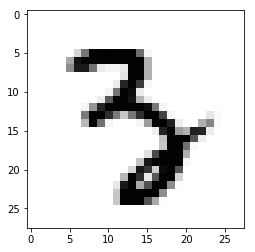

In [0]:
plt.imshow(X.reshape(28,28), cmap = 'Greys')

# nomoralize data  (將數據壓縮在0-1之間)

## 有助於模型的訓練 (參數不受極大值 極小值影響) 

In [0]:
x_train_1 = x_train / x_train.max()
x_test_1 = x_test / x_test.max()

x_test_1.max()

1.0

In [0]:
x_train_2 = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_2 = (x_test - x_test.min()) / (x_test.max() - x_test.min())

x_test_2.max()

1.0

In [0]:
model2 = Sequential()
model2.add(Dense(32, input_dim = 784))
model2.add(Activation("relu"))
model2.add(Dense(16))
model2.add(Activation("relu"))
model2.add(Dense(8))
model2.add(Activation("relu"))
model2.add(Dense(4))
model2.add(Activation("relu"))
model2.add(Dense(2))
model2.add(Activation("relu"))
# output
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.compile(loss = 'mse', optimizer= Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics = ['accuracy'])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_7 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_8 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 136       
_________________________________________________________________
activation_9 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
__________

In [0]:
model2_20 = model2.fit(x_train_1, y_train,
                       batch_size = 100, 
                       epochs = 1000, 
                       verbose = 1, 
                       validation_data = (x_test_1, y_test))  
## vebose:訓練過程是否呈現 0:no, 1: yes 2:not visualize
## by using val_data can fit both training and testing data

Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 3s 42us/step - loss: 0.0645 - acc: 0.4455 - val_loss: 0.0511 - val_acc: 0.6483
Epoch 2/1000
60000/60000 [==============================] - 2s 35us/step - loss: 0.0468 - acc: 0.6531 - val_loss: 0.0428 - val_acc: 0.6663
Epoch 3/1000
60000/60000 [==============================] - 2s 36us/step - loss: 0.0416 - acc: 0.6660 - val_loss: 0.0396 - val_acc: 0.6751
Epoch 4/1000
60000/60000 [==============================] - 2s 35us/step - loss: 0.0382 - acc: 0.6962 - val_loss: 0.0350 - val_acc: 0.7686
Epoch 5/1000
60000/60000 [==============================] - 2s 34us/step - loss: 0.0292 - acc: 0.8281 - val_loss: 0.0245 - val_acc: 0.8907
Epoch 6/1000
60000/60000 [==============================] - 2s 35us/step - loss: 0.0196 - acc: 0.9178 - val_loss: 0.0164 - val_acc: 0.9220
Epoch 7/1000
60000/60000 [==============================] - 2s 35us/step - loss: 0.0141 - acc: 0.9313 - val_loss: 0.

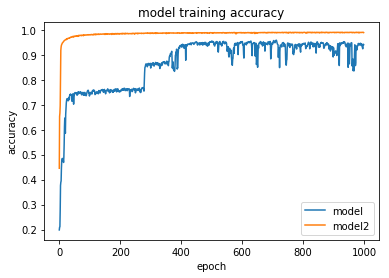

In [0]:
plt.plot(model_20.history["acc"])
plt.plot(model2_20.history["acc"])

plt.title('model training accuracy')
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.legend(['model' , 'model2'], loc = 'best')

In [0]:
scores2 = model2.evaluate(x_test_1, y_test)
print("loss: " , score[0])
print('acc: ', score[1])

10000/10000 [==============================] - 0s 33us/step
loss:  0.014286476187733934
acc:  0.9226
